[View in Colaboratory](https://colab.research.google.com/github/tiagoandresvaz/curso_machine_learning_na_saude/blob/master/Introdu%C3%A7%C3%A3o_ao_Aprendizado_de_M%C3%A1quina_na_Sa%C3%BAde_Custo_M%C3%ADnimo.ipynb)

**Introdução ao Aprendizado de Máquina na Saúde - Custo Mínimo.ipynb**

```
Utiliza dados de 303 pacientes para inferir com o uso dos algoritmos Naive Bayes, Decision Tree e Random Forest a melhor resposta para a pergunta: 

Quais pacientes devem fazer um novo tipo de exame com objetivo de evitar ao máximo o disperdício de recursos financeiros? 

Segundo os gestores do hospital, cada erro está associado a um custo financeiro de até oitocentos reais.

```





Inicia instalando no ambiente do usuário no Google Colab os pacotes:

**Matplotlib** 

https://matplotlib.org/

**Orange**

https://orange.biolab.si




In [2]:
!pip install -q matplotlib
!pip install Orange3


    100% |████████████████████████████████| 3.9MB 6.3MB/s 
    100% |████████████████████████████████| 51kB 20.4MB/s 
    100% |████████████████████████████████| 112kB 25.5MB/s 
    100% |████████████████████████████████| 552kB 19.6MB/s 
    100% |████████████████████████████████| 1.6MB 17.0MB/s 
    100% |████████████████████████████████| 112kB 27.8MB/s 
    100% |████████████████████████████████| 2.1MB 1.5MB/s 
    100% |████████████████████████████████| 61kB 13.4MB/s 
    100% |████████████████████████████████| 430kB 25.2MB/s 
    100% |████████████████████████████████| 102kB 29.2MB/s 
    100% |████████████████████████████████| 256kB 28.2MB/s 
  Running setup.py bdist_wheel for Orange3 ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/3b/60/63/d3f61bbdaa184a8a344b2e3589a3769e8fde662b39fbfccc15
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import Orange 
from collections import Counter

from Orange.data import Table
from Orange.classification import NaiveBayesLearner, TreeLearner, RandomForestLearner 
from Orange.evaluation import CrossValidation
from Orange.evaluation import AUC


import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0



Após importar e declarar as bibliotecas para o uso neste código, valida o uso da GPU. 

O trecho abaixo inicia a carga na memória dos dados dos pacietes, descreve as variáveis e imprime 10 linhas de exemplos.


In [4]:
heart = Table("heart_disease")

n = len(heart.domain.attributes)
n_cont = sum(1 for a in heart.domain.attributes if a.is_continuous)
n_disc = sum(1 for a in heart.domain.attributes if a.is_discrete)
print("%d variáveis: %d continuas, %d discretas" % (n, n_cont, n_disc))

print("Atributos:", ", ".join(x.name for x in heart.domain.attributes))
print("Classe:", heart.domain.class_var.name)
print("Distribuição da Classe:",Counter(str(d.get_class()) for d in heart))
print("Total de Instâncias", len(heart))

print("Amostra:" ,heart[:10])



13 variáveis: 6 continuas, 7 discretas
Atributos: age, gender, chest pain, rest SBP, cholesterol, fasting blood sugar > 120, rest ECG, max HR, exerc ind ang, ST by exercise, slope peak exc ST, major vessels colored, thal
Classe: diameter narrowing
Distribuição da Classe: Counter({'0': 164, '1': 139})
Total de Instâncias 303
Amostra: [[63, male, typical ang, 145, 233, 1, left vent hypertrophy, 150, 0, 2.3, downsloping, 0, fixed defect | 0],
 [67, male, asymptomatic, 160, 286, 0, left vent hypertrophy, 108, 1, 1.5, flat, 3, normal | 1],
 [67, male, asymptomatic, 120, 229, 0, left vent hypertrophy, 129, 1, 2.6, flat, 2, reversable defect | 1],
 [37, male, non-anginal, 130, 250, 0, normal, 187, 0, 3.5, downsloping, 0, normal | 0],
 [41, female, atypical ang, 130, 204, 0, left vent hypertrophy, 172, 0, 1.4, upsloping, 0, normal | 0],
 [56, male, atypical ang, 120, 236, 0, normal, 178, 0, 0.8, upsloping, 0, normal | 0],
 [62, female, asymptomatic, 140, 268, 0, left vent hypertrophy, 160, 0, 

Após, é feito o treinamento com validação cruzada (k=5) na classificação de pacientes, retornando a probabilidade de um paciente estar doente (1) ou não (0).  Teste os resultados utilizando k=50.


In [5]:
nb = NaiveBayesLearner()
dt = TreeLearner(max_depth=3)
rf = RandomForestLearner(n_estimators=100)
scores = CrossValidation(heart, [nb, dt, rf] , k=50)


print("COMPARANDO MODELOS PREDITIVOS")
print("Naive Bayes")
print("Accuracy: %.3f" % Orange.evaluation.CA(scores)[0])
print("AUC:      %.3f" % Orange.evaluation.scoring.AUC(scores)[0])
print("AUC:      %.3f" % Orange.evaluation.AUC(scores)[0])


print("Decision Tree")
print("Accuracy: %.3f" % Orange.evaluation.scoring.CA(scores)[1])
print("AUC:      %.3f" % Orange.evaluation.scoring.AUC(scores)[1])

print("Random Forrest")
print("Accuracy: %.3f" % Orange.evaluation.scoring.CA(scores)[2])
print("AUC:      %.3f" % Orange.evaluation.scoring.AUC(scores)[2])

#take probabilites of class 1 (sick)
p1 = scores.probabilities[0][:, 1]
p2 = scores.probabilities[1][:, 1]
p3 = scores.probabilities[2][:, 1]

print("COMPARANDO RESULTADOS PREDITIVOS")
#show actual class values
y = scores.actual
print("Actual",y[:5])

#show predictions
print("Naive Bayes",p1[:5])
#show predictions
print("Decision Tree",p2[:5])
#show predictions
print("Random Forrest",p3[:5])


COMPARANDO MODELOS PREDITIVOS
Naive Bayes
Accuracy: 0.835
AUC:      0.909
Decision Tree
Accuracy: 0.766
AUC:      0.785
Random Forrest
Accuracy: 0.828
AUC:      0.906
COMPARANDO RESULTADOS PREDITIVOS
Actual [0. 1. 0. 0. 1.]
Naive Bayes [0.0054032  0.6991832  0.6811248  0.77288973 0.10359119]
Decision Tree [0.4        0.         0.3488372  0.8333333  0.33333334]
Random Forrest [0.33 0.54 0.16 0.59 0.31]


Foram comparados os seguintes algoritmos:


**Naive Bayes**
classification.NaiveBayesLearner(preprocessors=None)
Naive Bayes classifier. Works only with discrete attributes. By default, continuous attributes are discretized.


**Decision Tree**
classification.TreeLearner(args, binarize=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, sufficient_majority=0.95, preprocessors=None).

The tree growth can be limited by the required number of instances for internal nodes and for leafs, the sufficient proportion of majority class, and by the maximal depth of the tree.

**Random Forest**
classification.RandomForestLearner(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, class_weight=None, preprocessors=None)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 


In [6]:
#Custo de R$500,00 para os Falso-positivos (paciente classificado doente quando saudável)
fp_cost = 500

#Custo de R$800,00 do Falso-negativo (paciente classificado saudável quaando doente)
fn_cost = 800

#declaramos que o threshold > 1 (ninguém está doente)
#falso positivo = 0
fp = 0
#falso negativo inicia com o nro de verdadeiros positivos
fn = np.sum(y)

print ("Total de falso positivos (1):", fp)
print ("Total de falso negativo (0):", fn)

Total de falso positivos (1): 0
Total de falso negativo (0): 139.0


Para cada treshold calculamos um vetor de probabilidades (ps) e custos associados (costs).

In [7]:
ps = []
costs = []
#calcula os custos de classificar i pacientes como doentes (Naive Bayes)
for i in np.argsort(p1)[::-1]:
   if y[i] == 0:
       fp += 1
   else:
       fn -= 1
   ps.append(p1[i])
   costs.append(fp * fp_cost + fn * fn_cost)
   
print(ps[:5])
print (costs[:5])

[0.9999616, 0.9999506, 0.9999443, 0.99992055, 0.9999078]
[110400.0, 109600.0, 108800.0, 108000.0, 107200.0]


In [8]:
#ordena as previsões de custos e seleciona a probabilidade relacionada ao menor custo
costs = np.array(costs)
#pacientes acima desta probabilidade trarão o menor custo
print(ps[costs.argmin()])

0.49265233


Este é o treshold que minimiza os custos da classificação dos pacientes.

Ao final, compreendemos que os médicos podem mandar fazer o novo exame em todos os pacientes que no futuro apresentarem a probabilidade de estarem doentes maior ou igual a 0,35 (0,49). 

O gráfico para analisar o treshold pode ser representado assim:

Text(0,0.5,'Custo')

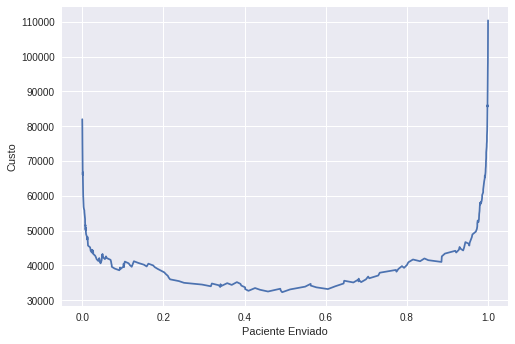

In [9]:
fig, ax = plt.subplots()
plt.plot(ps, costs)
ax.set_xlabel('Paciente Enviado')
ax.set_ylabel('Custo')